In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading cleaner data
from env import user, password, host
import os

In [523]:
# # df = pd.read_clipboard()
# # df.to_csv("anomalous_curriculum.csv")
# df = pd.read_csv("anomalous_curriculum.csv")

In [524]:
# df.head()

In [525]:
# df.columns

In [526]:
# del df['Unnamed: 0']
# df = df.rename(columns={"2018-01-26" : 'date', "09:55:03": "time", "/":"file_location", '1': "user_id", "8":"cohort_id", "97.105.19.61":"ip_address"})

In [527]:
# df.columns

In [528]:
# df.info()

In [529]:
# df['date_time'] = df.date + " " + df.time

In [530]:
# df.head()

In [531]:
# df['date_time'] = pd.to_datetime(df.date_time)
# df.info()

In [532]:
# df[df.ip_address == "22"]

In [533]:
# del df['date']
# del df['time']
# df.head()

In [534]:
# df[df.ip_address == "22"]

In [535]:
# df[df.file_location == "java-ii/object-oriented-programming"]

In [536]:
# df = df.set_index(df.date_time)

In [537]:
# # Moving the date from 'eight' to the 'ip_address' area.
# for r in df[df.ip_address.isnull()].index:
#     if len(df.loc[r, 'cohort_id']) > 5:
#         df.loc[r, "ip_address"] = df.loc[r, "cohort_id"]
#     else:
#         df.loc[r, 'ip_address'] = '0'


In [538]:
# df[df.ip_address == '0']

In [539]:
# df.loc['2018-01-26 16:46:16', "ip_address"] = df.loc['2018-01-26 16:46:16', "eight"]
# df.loc['2018-01-26 16:46:16', "ip_address"]

In [540]:
# df[df.ip_address.isnull()]

In [541]:
# df['cohort_id'] = df.cohort_id.fillna('0')

In [542]:
# for r in df[df.file_location == "/"].date_time:
#     df.loc[r,'file_location'] = "Root"

In [543]:
# df.info()

In [544]:
# df.head()
# df = df.drop(columns="date_time")

In [545]:
# df.head()

In [546]:
# for v in df.ip_address:
#     if len(v) < 7 and v != '0':
#         print(v)

In [547]:
# df.ip_address.nunique()

In [548]:
# df.head()

In [549]:
def get_url(db, user=user, password=password, host=host):
    '''
    take database name for input,
    returns url, using user, password, and host pulled from your env file.
    PLEASE save it as a variable, and do NOT just print your credientials to your document.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [550]:
def get_curriculum_data(sql= '''SELECT * FROM logs;'''):
    '''
    Returns the curriculum anomalous dataset, checks local disk for anomalous_curriculum.csv, if present loads it, 
    otherwise it pulls the data from SQL and then saves it to local disk as 'anomalous_curriculum.csv'
    (This is set up for Codeup's SQL server, with database title 'curriculum_logs'.)
    '''
    filename = "anomalous_curriculum.csv"
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        df = pd.read_sql(sql, get_url('curriculum_logs'))
        df.to_csv(filename)
        return df 

In [551]:
df = get_curriculum_data()

In [552]:
df.head()

,Unnamed: 0,date,time,path,user_id,cohort_id,ip
0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900223 non-null  int64  
 1   date        900223 non-null  object 
 2   time        900223 non-null  object 
 3   path        900222 non-null  object 
 4   user_id     900223 non-null  int64  
 5   cohort_id   847330 non-null  float64
 6   ip          900223 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 48.1+ MB


In [554]:
df[df.cohort_id.isnull()].date.unique()

array(['2018-01-26', '2018-01-28', '2018-01-29', '2018-01-30',
       '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-04',
       '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
       '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-13',
       '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-19',
       '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23',
       '2018-02-25', '2018-02-26', '2018-02-27', '2018-02-28',
       '2018-03-02', '2018-03-04', '2018-03-05', '2018-03-06',
       '2018-03-07', '2018-03-08', '2018-03-09', '2018-03-10',
       '2018-03-12', '2018-03-13', '2018-03-14', '2018-03-15',
       '2018-03-16', '2018-03-17', '2018-03-18', '2018-03-19',
       '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
       '2018-03-24', '2018-03-25', '2018-03-26', '2018-03-27',
       '2018-03-28', '2018-03-29', '2018-03-30', '2018-04-02',
       '2018-04-03', '2018-04-04', '2018-04-05', '2018-04-06',
       '2018-04-07', '2018-04-08', '2018-04-09', '2018-

In [555]:
df['date_time'] = df.date + " " + df.time
df['date_time'] = pd.to_datetime(df.date_time)
del df['date']
del df['time']
del df['Unnamed: 0']
df = df.set_index(df.date_time)
df = df.drop(columns="date_time")
df.head()

,path,user_id,cohort_id,ip
date_time,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [556]:
df.cohort_id = df.cohort_id.fillna(0)

In [557]:
df[df.cohort_id == 0].user_id.unique()

array([ 48,  54,  58,  59,  61,  62,  63,  73,  74,  78,  79,  86,  88,
        89, 100, 103, 111, 137, 166, 176, 213, 247, 317, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 372, 375, 403, 406, 429, 544,  64, 713,
       714, 715, 716, 717, 718, 663, 719, 720, 721, 722, 723, 724, 725,
       726, 727, 728, 729, 346, 731, 736, 644, 744, 782, 810, 814, 815])

In [558]:
def unique(list1):
  
    # initialize a null list
    unique_list = []
  
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print(x)

-------

#### Charts:


array([[<AxesSubplot:title={'center':'cohort_id'}>,
        <AxesSubplot:title={'center':'date_time'}>],
       [<AxesSubplot:title={'center':'path'}>,
        <AxesSubplot:title={'center':'user_id'}>],
       [<AxesSubplot:title={'center':'cohort'}>,
        <AxesSubplot:title={'center':'ip'}>]], dtype=object)

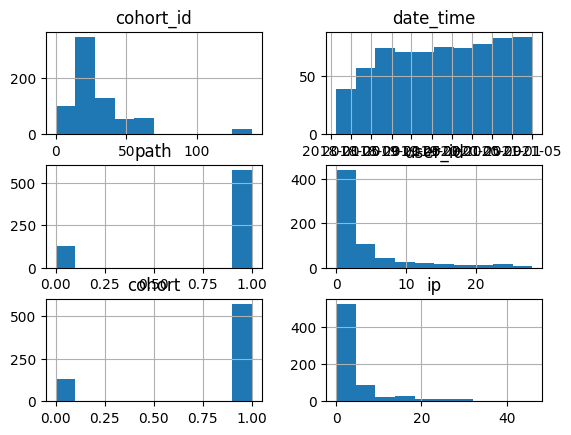

In [581]:
unique_java1.hist()

----

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


In [559]:
unique_java1 = df[df.path == "javascript-i"].groupby("cohort_id").resample("M").nunique()

In [560]:
unique_java1.head()

path  user_id  cohort_id  ip
cohort_id date_time                               
0.0       2018-01-31     1        2          1   2
          2018-02-28     1        5          1   5
          2018-03-31     1        4          1   4
          2018-04-30     1        4          1   7
          2018-05-31     1        3          1   3

In [561]:
unique_java1 = unique_java1.rename(columns={"cohort_id":"cohort"})

In [564]:
unique_java1 = unique_java1.reset_index()

I have the Monthly Sum of Traffic so I can compare and examine.

In [569]:
unique_java1['cohort_id'] = unique_java1.cohort_id.astype(int)

In [571]:
unique_java1.cohort_id.unique()

array([  0,   1,   2,   6,   7,   8,  11,  12,  13,  14,  15,  16,  17,
        18,  19,  21,  22,  23,  24,  25,  26,  27,  28,  29,  31,  32,
        33,  34,  51,  52,  53,  56,  57,  58,  61,  62, 132, 134, 135,
       138, 139])

In [582]:
unique_java1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   cohort_id  706 non-null    int64         
 1   date_time  706 non-null    datetime64[ns]
 2   path       706 non-null    int64         
 3   user_id    706 non-null    int64         
 4   cohort     706 non-null    int64         
 5   ip         706 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 33.2 KB



2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?


4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?


5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?


6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?


7. Which lessons are least accessed? 


8. Anything else I should be aware of?